# Part II - (Prosper Loan Analysis)
## by (Othniel)

>**Before you start**: You must have the README.md file ready that include a summary of main findings that reflects on the steps taken during the data exploration (Part I notebook). The README.md file should also describes the key insights that will be conveyed by the explanatory slide deck (Part II  outcome)



## Investigation Overview


> Describe the overall goals of your presentation here. Add a summary of key insights at the start of the notebook, just as you added in the README.md. This will help your notebook to stay aligned to the key insights you want to include in your slide deck.

> **Rubric Tip**: The key insights in the slideshow must match those documented in the README.md summary. 


## Dataset Overview

> Provide a brief overview of the dataset to be presented here.

In [2]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [3]:
# load in the dataset into a pandas dataframe
loan_df= pd.read_csv('loan data.csv');

> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

# (Visualization 1)

> presence of outliers for loans that have been completed, charged off and defaulted when compared with the interest rate.

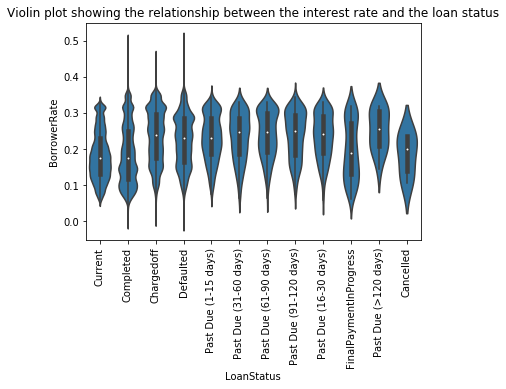

In [4]:
status_list=loan_df.LoanStatus.value_counts().index.tolist()
rating_list=['AA','A','B','C','D','E','HR']
rating_list
['AA', 'A', 'B', 'C', 'D', 'E', 'HR']
ProsperRating=pd.api.types.CategoricalDtype(ordered=True,categories=rating_list)
loan_df['ProsperRating (Alpha)']=loan_df['ProsperRating (Alpha)'].astype(ProsperRating)
loanStatus = pd.api.types.CategoricalDtype(ordered=True, categories= status_list)
loan_df['LoanStatus']= loan_df['LoanStatus'].astype(loanStatus);
color=sb.color_palette()[0]
sb.violinplot(data=loan_df, x= 'LoanStatus',y='BorrowerRate',color=color);
plt.xticks(rotation=90);
plt.title('Violin plot showing the relationship between the interest rate and the loan status');

# (Visualization 2)

loans for 36month period have extremely high interest rate

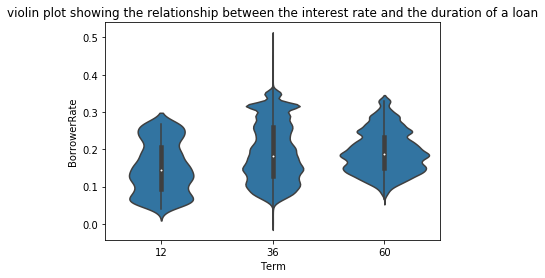

In [5]:
sb.violinplot(data=loan_df,x='Term',y='BorrowerRate',color=color);
plt.title('violin plot showing the relationship between the interest rate and the duration of a loan');

## (Visualization 3)



Presence of upwards outliers which shows that more expensive loans were completed

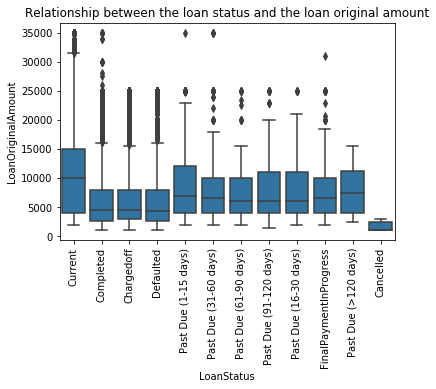

In [6]:
sb.boxplot(data = loan_df, x= 'LoanStatus', y='LoanOriginalAmount',color=color);
plt.xticks(rotation=90);
plt.title('Relationship between the loan status and the loan original amount');

Positive trend between the interest rate and the lender's profit which means that the higher the interest rate, the higher the lender's profit

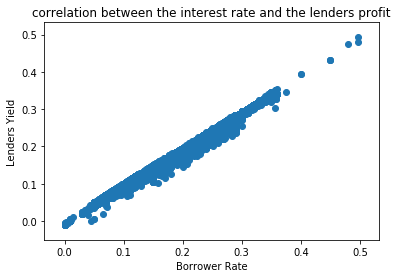

In [7]:
plt.scatter(data= loan_df, x='BorrowerRate', y='LenderYield');
plt.xlabel('Borrower Rate');
plt.ylabel('Lenders Yield');
plt.title('correlation between the interest rate and the lenders profit');

Even though loans of 36 month had high interest rates, loans of 60months had a more positive correlation than those of 36months

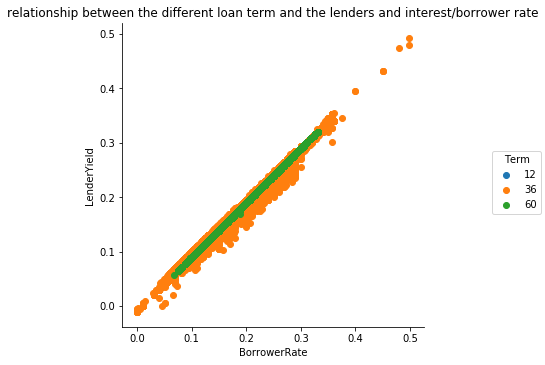

In [8]:
g=sb.FacetGrid(data=loan_df,hue='Term',size=5)
g.map(plt.scatter,'BorrowerRate','LenderYield')
g.add_legend(loc='upper right');
plt.title('relationship between the different loan term and the lenders and interest/borrower rate');

### Generate Slideshow
Once you're ready to generate your slideshow, use the `jupyter nbconvert` command to generate the HTML slide show.  

In [ ]:
# Use this command if you are running this file in local
!jupyter nbconvert Part_II_slide_deck_template.ipynb --to slides --post serve --no-input --no-prompt

[NbConvertApp] Converting notebook Part_II_slide_deck_template.ipynb to slides
[NbConvertApp] Writing 440197 bytes to Part_II_slide_deck_template.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Serving your slides at http://127.0.0.1:8000/Part_II_slide_deck_template.slides.html
Use Control-C to stop this server
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: x-www-browser: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: firefox: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: iceweasel: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: seamonkey: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: mozilla: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: epiphany: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: konqueror: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: chromium-browser: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: google-chrome: not found
/usr/bin/xdg-open: 778: /usr/bin/

> In the classroom workspace, the generated HTML slideshow will be placed in the home folder. 

> In local machines, the command above should open a tab in your web browser where you can scroll through your presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent slide. Make sure you remove all of the quote-formatted guide notes like this one before you finish your presentation! At last, you can stop the Kernel. 

### Submission
If you are using classroom workspace, you can choose from the following two ways of submission:

1. **Submit from the workspace**. Make sure you have removed the example project from the /home/workspace directory. You must submit the following files:
   - Part_I_notebook.ipynb
   - Part_I_notebook.html or pdf
   - Part_II_notebook.ipynb
   - Part_I_slides.html
   - README.md
   - dataset (optional)


2. **Submit a zip file on the last page of this project lesson**. In this case, open the Jupyter terminal and run the command below to generate a ZIP file. 
```bash
zip -r my_project.zip .
```
The command abobve will ZIP every file present in your /home/workspace directory. Next, you can download the zip to your local, and follow the instructions on the last page of this project lesson.
